# Import package

In [2]:
import os
import pandas as pd
import numpy as np
from root_numpy import root2array 
import uproot


Welcome to JupyROOT 6.20/04


$ cd <path_to_your_root_file>
$　root XXX.root
[root] _file0->ls()
[root] Delphes->MakeClass()

# Load root file

In [216]:
# root_file = "./SVJ_pythia/Nowidth/Z2000/delphes_nolhe_Z2000_rinv_04_Matching.root"
root_file = "/home/james/SVJ_pythia/Nowidth/Z1500/delphes_nolhe_Z1500_rinv_0.root"
file = uproot.open(root_file)
file

<ROOTDirectory b'/home/james/SVJ_pythia/Nowidth/Z1500/delphes_nolhe_Z1500_rinv_0.root' at 0x7f8b00794128>

# Check index and function in "file"

In [13]:
print(file.keys())
dir(file["Delphes;1"])

[b'ProcessID0;1', b'Delphes;1']


['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__metaclass__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_attachstreamer',
 '_bases',
 '_branch_flags',
 '_branch_regex',
 '_branchlookup',
 '_classname',
 '_classversion',
 '_context',
 '_copycontext',
 '_dtype1',
 '_dtype2',
 '_fAliases',
 '_fAutoFlush',
 '_fAutoSave',
 '_fBranches',
 '_fClusterRangeEnd',
 '_fClusterSize',
 '_fDefaultEntryOffsetLen',
 '_fEntries',
 '_fEstimate',
 '_fFillColor',
 '_fFillStyle',
 '_fFlushedBytes',
 '_fFriends',
 '_fIOFeatures',
 '_fIndex',
 '_fIndexValues',
 '_fLeaves',
 '_fLineColor',
 '_fLineStyle',
 '_fLineWidth',
 '_fMarkerColor',
 '_fMarkerSize',
 '_fMarkerStyle',

In [19]:
file["Delphes;1"]["Particle.Status"].array()[0] #first event particle status

array([ 4,  4, 21, ...,  2,  1,  1], dtype=int32)

In [217]:
event = [file["Delphes;1"]["Particle.Status"].array(),
         file["Delphes;1"]["Particle.M1"].array(),
         file["Delphes;1"]["Particle.M2"].array(),
         file["Delphes;1"]["Particle.D1"].array(),
         file["Delphes;1"]["Particle.D2"].array(),
         file["Delphes;1"]["Particle.PID"].array(),
         file["Delphes;1"]["Particle.PT"].array(),
         file["Delphes;1"]["Particle.Eta"].array(),
         file["Delphes;1"]["Particle.Phi"].array(),
         file["Delphes;1"]["Particle.Mass"].array(),
        ]
_Status, _M1, _M2, _D1, _D2, _PID, _PT, _Eta, _Phi, _Mass, _index = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
Labels = ["Status", "M1", "M2", "D1", "D2", "PID", "PT", "Eta", "Phi", "Mass"]


In [218]:
root_file2 = "/home/james/SVJ_pythia/Nowidth/Z1500/delphes_nolhe_Z1500_rinv_03.root"
file2 = uproot.open(root_file2)
event2 = [file2["Delphes;1"]["Particle.Status"].array(),
         file2["Delphes;1"]["Particle.M1"].array(),
         file2["Delphes;1"]["Particle.M2"].array(),
         file2["Delphes;1"]["Particle.D1"].array(),
         file2["Delphes;1"]["Particle.D2"].array(),
         file2["Delphes;1"]["Particle.PID"].array(),
         file2["Delphes;1"]["Particle.PT"].array(),
         file2["Delphes;1"]["Particle.Eta"].array(),
         file2["Delphes;1"]["Particle.Phi"].array(),
         file2["Delphes;1"]["Particle.Mass"].array(),
        ]


# Show truth record

In [215]:
# Particle status in Pythia8: http://home.thep.lu.se/~torbjorn/pythia81html/ParticleProperties.html
print("Index", "\t","Status", "\t","M1" "\t","M2" ,"\t","D1", "\t","D2", "\t","PID", "\t\t","PT" "\t","Eta", "\t\t","Phi", "\t\t","Mass")
for j in range(len(event[0][0])):  
    print(j, "\t", event[_Status][0][j],  "\t\t", event[_M1][0][j], "\t", event[_M2][0][j], "\t", event[_D1][0][j], "\t", 
          event[_D2][0][j],  "\t", str(event[_PID][0][j]).ljust(12, ' '), "\t", round(event[_PT][0][j],0),  "\t",
          str(round(event[_Eta][0][j],2)).ljust(12, ' ') , "\t",str(round(event[_Phi][0][j],3)).ljust(12, ' '),  "\t",round(event[_Mass][0][j],3)) 
 

Index 	 Status 	 M1	 M2 	 D1 	 D2 	 PID 		 PT	 Eta 		 Phi 		 Mass
0 	 4 		 -1 	 -1 	 312 	 -1 	 2212         	 0.0 	 999.9        	 0.0          	 0.938
1 	 4 		 -1 	 -1 	 313 	 -1 	 2212         	 0.0 	 -999.9       	 0.0          	 0.938
2 	 21 		 5 	 5 	 4 	 -1 	 2            	 0.0 	 999.9        	 0.0          	 0.0
3 	 21 		 6 	 -1 	 4 	 -1 	 -2           	 0.0 	 -999.9       	 0.0          	 0.0
4 	 22 		 2 	 3 	 7 	 7 	 5000001      	 0.0 	 999.9        	 0.0          	 1996.878
5 	 42 		 9 	 9 	 2 	 2 	 2            	 0.0 	 999.9        	 2.488        	 0.0
6 	 41 		 10 	 -1 	 8 	 3 	 -2           	 0.0 	 -999.9       	 -0.654       	 0.0
7 	 44 		 4 	 4 	 11 	 11 	 5000001      	 8.0 	 5.31         	 2.488        	 1996.878
8 	 43 		 6 	 -1 	 12 	 12 	 21           	 8.0 	 -2.78        	 -0.654       	 0.0
9 	 42 		 22 	 22 	 5 	 5 	 2            	 0.0 	 999.9        	 2.326        	 0.0
10 	 41 		 23 	 -1 	 13 	 6 	 -2           	 0.0 	 -999.9       	 -0.816       	 0.0
11 	 

# Define function to trace particle decay

In [156]:
def find_decayratio(event,n, ID = 4900101, mode = 'daughter'):
    d1, d2 = -1, -1
    d0 = -1
    for j in  range(len(event[0][n])):
        if(event[5][n][j]==ID)&(event[0][n][j]==23): #23 : hardest outgoing particles
            d1 = event[_D1][n][j]
            d2 = event[_D2][n][j]
            while((event[_PID][n][d1]==ID)or(event[5][n][d2]==ID) ):
                if(event[_PID][n][d1]==ID):
                    d0 = d1
                    d1 = event[_D1][n][d0]
                    d2 = event[_D2][n][d0]
                if(event[_PID][n][d2]==ID)&(event[_PID][n][d1]!=ID):
                    d0 = d2
                    d1 = event[_D1][n][d0]
                    d2 = event[_D2][n][d0]
                        
    if mode=='daughter':
        return d1, d2
    if mode=='id':
        return event[_PID][n][d1], event[_PID][n][d2]
    
def find_subdecayratio(event, n, j, ID=4900111): 
    d1, d2 = -1, -1
    d0 = -1
    d1 = event[_D1][n][j]
    d2 = event[_D2][n][j]
    if((abs(event[_PID][n][d1])!=ID)&(abs(event[_PID][n][d2])!=ID)):
        d1=0
        d2=0
        return d1, d2
    else:
        while((abs(event[_PID][n][d1])==ID)or(abs(event[_PID][n][d2])==ID) ):
            if(abs(event[_PID][n][d1])==ID):
                d0 = d1
                d1 = event[_D1][n][d0]
                d2 = event[_D2][n][d0]
            if(abs(event[_PID][n][d2])==ID):
                d0 = d2
                d1 = event[_D1][n][d0]
                d2 = event[_D2][n][d0]
        return event[_PID][n][d1], event[_PID][n][d2]
def find_daughterid(event, n, j, ID=4900111):
    sid = event[_PID][n][j]
    if(sid!=ID):
        return 0, 0
    else:
        d1 = event[_D1][n][j]
        d2 = event[_D2][n][j]
        return event[_PID][n][d1], event[_PID][n][d2]
        

In [157]:
find_decayratio(event,0)

(733, 767)

# Trace certain particle ID untile it "decay" (daughter1!=daughter2)

In [33]:
n=0
ID=4900113
N = []
for j in  range(len(event[0][n])):
    if(event[_PID][n][j]==ID): #23 : hardest outgoing particles
        print("Self index in event",j)
        m1 = event[_M1][n][j]
        m2 = event[_M2][n][j]
        print("Mother:",m1,m2)
        if (m1==m2):
            print("Mother_id:", event[_PID][n][m1], "nan\n")
        else:
            print("Mother_id:", event[_PID][n][m1], event[_PID][n][m2],"\n")
        d1 = event[_D1][n][j]
        d2 = event[_D2][n][j]
        prevent = 0
        while(d1==d2): 
            d0 = d1
            if(d1==-1):
                print("stable particles\n\n")
                break
            if(prevent >= 100):
                print("infinite loop!")
                prevent=0
                break
            d1 = event[_D1][n][d1]
            d2 = event[_D2][n][d2]
            if(d1!=d2):
                N.append(d0)
            prevent= prevent+1
        if(d1!=-1):
            print("Daughter", d1, d2)
            print("Daughter_id", event[_PID][n][d1], event[_PID][n][d2])
            m1, m2 = event[_M1][n][d1], event[_M2][n][d1]
            print("Daughter1_parents", m1, m2)
            if(m1==m2):
                print("Daughter1_parents_id", event[_PID][n][m1], "nan") 
            else:
                print("Daughter1_parents_id", event[_PID][n][m1], event[_PID][n][m2])
            m1, m2 = event[_M1][n][d2], event[_M2][n][d2]
            print("Daughter2_parents", m1, m2)
            if(m1==m2): 
                print("Daughter2_parents_id", event[_PID][n][m1], "nan","\n")
            else:
                print("Daughter2_parents_id", event[_PID][n][m1], event[5][n][m2],"\n")

Self index in event 733
Mother: 657 732
Mother_id: 4900101 -4900101 

Daughter 1169 1170
Daughter_id -1 1
Daughter1_parents 733 -1
Daughter1_parents_id 4900113 -211
Daughter2_parents 733 -1
Daughter2_parents_id 4900113 -211 

Self index in event 743
Mother: 657 732
Mother_id: 4900101 -4900101 

Daughter 1186 1187
Daughter_id 4900213 -4900213
Daughter1_parents 743 -1
Daughter1_parents_id 4900113 -211
Daughter2_parents 743 -1
Daughter2_parents_id 4900113 -211 

Self index in event 744
Mother: 657 732
Mother_id: 4900101 -4900101 

Daughter 1188 1189
Daughter_id 4900213 -4900213
Daughter1_parents 744 -1
Daughter1_parents_id 4900113 -211
Daughter2_parents 744 -1
Daughter2_parents_id 4900113 -211 

Self index in event 746
Mother: 657 732
Mother_id: 4900101 -4900101 

Daughter 1190 1191
Daughter_id -1 1
Daughter1_parents 746 -1
Daughter1_parents_id 4900113 -211
Daughter2_parents 746 -1
Daughter2_parents_id 4900113 -211 

Self index in event 749
Mother: 657 732
Mother_id: 4900101 -4900101 

Da

# Trace outgoing Xd (4900101) in hardest subprocess 
# And then record the dark meson decay

In [219]:
# 4900111 and 4900113 is unstable dark meson
a113 = []
a111 = []
for n in range(1000):
    a1, a2 = find_decayratio(event,n) # find Xd -> a1 a2
    d1a1 = find_daughterid(event, n, a1, ID=4900111) # check whether a1 is 4900111 and find it's daughter
    d2a1 = find_daughterid(event, n, a2, ID=4900111) # check whether a2 is 4900111 and find it's daughter
    
    d1a2 = find_daughterid(event, n, a1, ID=4900113) # check whether a1 is 4900113 and find it's daughter
    d2a2 = find_daughterid(event, n, a2, ID=4900113) # check whether a2 is 4900113 and find it's daughter

    a111.append(d1a1)
    a111.append(d2a1)
    a113.append(d1a2)
    a113.append(d2a2)

# Calculate the ratio of stable dark meson in above record

In [220]:
#find 4900211 in 4900111 decay record (Note 4900211 is stable dark meson)
r = [sum([1 for i in a111 for j in i if (abs(j)== 4900211)]), sum([1 for i in a111 for j in i if (abs(j)!= 4900211)&(j!=0)])] 
print("The number_4900211/number_others in 4900111 decay particles : ", r[0]/sum(r))

The number_4900211/number_others in 4900111 decay particles :  0.0


In [221]:
#find 4900213 in 4900113 decay record (Note 4900211 is stable dark meson)
r = [sum([1 for i in a113 for j in i if (abs(j)== 4900213)]), sum([1 for i in a113 for j in i if (abs(j)!= 4900213)&(j!=0)])] 
print("The number_4900213/number_others in 4900113 decay particles :", r[0]/sum(r))

The number_4900213/number_others in 4900113 decay particles : 0.0


# Load weights and jets

In [229]:
W = file["Delphes;1"]["Event.Weight"].array()
jet = np.array([file["Delphes;1"]["Jet.PT"].array(),
       file["Delphes;1"]["Jet.Eta"].array(),
       file["Delphes;1"]["Jet.Phi"].array(),
       file["Delphes;1"]["Jet.Mass"].array()])
# W = [i[0][0] for i in W] #just reset the data structure to convenienc
# root_file2 = "./SVJ_pythia/Z2000/delphes_nolhe_Z2000_rinv_01.root"
# root_file2 = "./SVJ_pythia/Nowidth/Z2000/delphes_nolhe_Z2000_rinv_04_Matching.root"
# file2 = uproot.open(root_file2)
jet2 = np.array([file2["Delphes;1"]["Jet.PT"].array(),
       file2["Delphes;1"]["Jet.Eta"].array(),
       file2["Delphes;1"]["Jet.Phi"].array(),
       file2["Delphes;1"]["Jet.Mass"].array()])
W2 = file2["Delphes;1"]["Event.Weight"].array()
# W2 = [i[0][0] for i in W2]
#We set
_JPT, _JEta, _JPhi, _JMass = 0, 1, 2, 3

# Reshape dataset

In [230]:
jet = np.expand_dims(jet, axis=-1)
jet2 = np.expand_dims(jet2, axis=-1)
jet = jet.transpose((1,0,2))
jet2 = jet2.transpose((1,0,2))
jet = np.squeeze(jet,axis=(2,))
jet2 = np.squeeze(jet2,axis=(2,))
W = [i[0] for i in W]
W2 = [i[0] for i in W2]

In [160]:
nth_event = 9
nth_jet = 0
jet[nth_event][_JEta][nth_jet]

-1.5827645

In [161]:
jet.shape

(20000, 4)

# Define invariant mass function

In [139]:
def mass_inv(jet):
#    ["FatJet.PT", "FatJet.Eta", "FatJet.Phi", "FatJet.Mass"] 
# formula https://en.wikipedia.org/wiki/Invariant_mass#As_defined_in_particle_physics
    M_inv = 2*jet[_JPT][0]*jet[_JPT][1]*(np.cosh(jet[_JEta][0]-jet[_JEta][1])-np.cos(jet[_JPhi][0]-jet[_JPhi][1]))
    return M_inv**0.5
def mas_in(jet,n):
#    ["FatJet.PT", "FatJet.Eta", "FatJet.Phi", "FatJet.Mass"] 
# formula https://en.wikipedia.org/wiki/Invariant_mass#As_defined_in_particle_physics
    M_inv = 2*jet[_JPT][n]*jet[_JPT][n]*(np.cosh(jet[_JEta][n]-jet[_JEta][n])-np.cos(jet[_JPhi][n]-jet[_JPhi][n]))
    return M_inv**0.5
def ET(jet,n):
    return (mas_in(jet,n)**2+jet[_JPT][n]**2)**0.5
def deltaPhi(phi1,phi2):
    x = phi1-phi2
    while x>= np.pi: x -= np.pi*2.
    while x< -np.pi: x += np.pi*2.
    return x    

def mass_T(jet):
    M_T=2*ET(jet,1)*ET(jet,0)*(1-np.cos(deltaPhi(jet[_JPhi][1],jet[_JPhi][0])) ) 
    return  M_T**0.5

array([array([426.86154, 271.2201 ], dtype=float32)], dtype=object)

# Jet selection and fill up with invariant mass

In [231]:
## ALTAS selection
m_inv = []
m_T = []
Wc = []
for i in range(len(jet)):
    if jet[i][0].shape[0]<2: #at least two jet
        continue
    if jet[i][_JPT][0]<440: # leading jet pt >= 440 Gev
        continue
    if jet[i][_JPT][1]<60: #sub-leading jet pt >= 60 Gev
        continue
    if abs(jet[i][_JEta][0]-jet[i][_JEta][1])>=1.2:
        continue
    m_inv.append(mass_inv(jet[i]))
    m_T.append(mass_T(jet[i]))
    Wc.append(W[i])
m_inv2 = []
m_T2 = []
Wc2 = []
for i in range(len(jet2)):
    if jet2[i][0].shape[0]<2:
        continue
#     if jet2[i][0][0]<440:
#         continue
#     if jet2[i][0][1]<60:
#         continue
#     if abs(jet2[i][1][0]-jet2[i][1][1])>=1.2:
#         continue
    m_inv2.append(mass_inv(jet2[i]))
    m_T2.append(mass_T(jet2[i]))
    Wc2.append(W2[i])

# Jet matching

In [225]:
def deltaPhi(phi1,phi2):
    x = phi1-phi2
    while x>= np.pi: x -= np.pi*2.
    while x< -np.pi: x += np.pi*2.
    return x

def deltaR(eta1,phi1,eta2,phi2):
    return (deltaPhi(phi1,phi2)**2+(eta1-eta2)**2)**0.5
    
def Match(jet, event, dR, R = 0.5):
    return (dR > deltaR(jet[_JEta][0],jet[_JPhi][0],event[_pEta],event[_pPhi]))
def Match_dR(jet, event, R = 0.5):
    return deltaR(jet[_JEta][0],jet[_JPhi][0],event[_pEta],event[_pPhi])

In [226]:
def find_beforeshower(event,n, ID = 4900101):
    d1, d2 = -1, -1
    d0 = -1
    for j in  range(len(event[0][n])):
        if(event[5][n][j]==ID)&(event[0][n][j]==23): #23 : hardest outgoing particles
            d1 = event[_D1][n][j]
            d2 = event[_D2][n][j]
            while(d1==d2):
                d0 = d1
                d1 = event[_D1][n][d0]
                d2 = event[_D2][n][d0]
                if(d1!=d2):
                    break
            break

    return [event[_PT][n][d0], event[_Eta][n][d0], event[_Phi][n][d0]]
_pPT, _pEta, _pPhi = 0, 1, 2

In [213]:
def parton_berforeshower(event):
    parton = [[],[]]
    for i in range(len(event[0])):
        if i%1000==0:
            print(i)
        p1 = find_beforeshower(event,i, ID = 4900101)
        p2 = find_beforeshower(event,i, ID = -4900101)
        parton[0].append(p1)
        parton[1].append(p2)
    return parton


In [227]:
parton = parton_berforeshower(event)
parton2 = parton_berforeshower(event2)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000


In [211]:
def jet_Matching(jet, parton):
    parton_pT = []
    jet_pT = []
    label = []
    jet_dR = []
    for i in range(len(jet)): # i-th event
        dR = 0.2 # Matching radius
        ppT = -1
        if len(jet[i][0])<1: # don't have jet
            continue
        for j in range(2): # 4900101 and -4900101
            if(Match(jet[i], parton[j][i], dR)):
                dR = Match_dR(jet[i],parton[j][i])
                ppT = parton[j][i][_pPT]
                lb = j

        if(dR==0.2):
            continue
        jpt = jet[i][_JPT][0]
    
        parton_pT.append(ppT)
        jet_pT.append(jpt)
        label.append(lb)
        jet_dR.append(dR)
    return parton_pT, jet_pT, label, jet_dR

In [232]:
parton_pT, jet_pT, label, jet_dR = jet_Matching(jet, parton)
parton_pT2, jet_pT2, label2, jet_dR2 = jet_Matching(jet2, parton2)
jet_reso = np.array(jet_pT)/np.array(parton_pT)
jet_reso2 = np.array(jet_pT2)/np.array(parton_pT2)

# Calculate the cross section in root

In [151]:
nevn = jet.shape[0]
Xection = sum(W2)/nevn
Xection_with_selection = sum(Wc2)/nevn/Xection
Lumi = 37 #Luminosity fb^-1
expected_yield = (Xection)*Lumi*1000  #expected yield
expected_yield_c = (Xection_with_selection)*Lumi*1000 #expected yield
print("Cross section(pb) \t Cross section with selection(pb) \t Expected yield (tatal)\t Expected yield for Selection")
print(Xection,"\t",Xection_with_selection,"\t\t\t",expected_yield,'\t',expected_yield_c)

Cross section(pb) 	 Cross section with selection(pb) 	 Expected yield (tatal)	 Expected yield for Selection
0.7868780493736267 	 0.26205 			 29114.48782682419 	 9695.85


# Plot

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


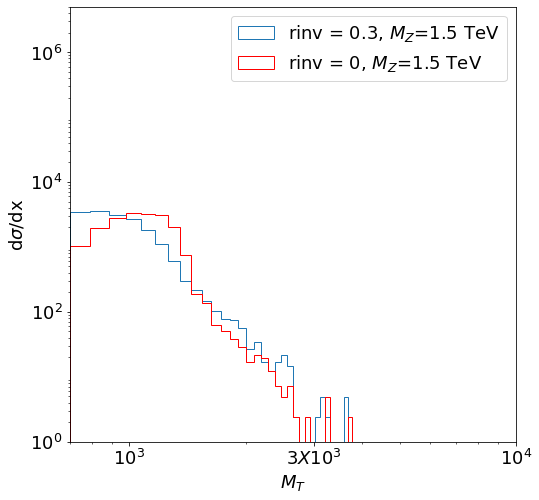

In [237]:
import matplotlib.pyplot as plt
bins = 100
fs=18 # front size
tagsize = 18 # label tag size ((\blue block) W \n (\orange block) QCD )
plt.figure(figsize=(8,8)) # plotsize
x1, x2 = 700, 10000

bisize = np.linspace(500,10000,101)


plt.hist(m_inv2 ,bins=bins, histtype='step',  range=[x1, x2], weights= np.array(Wc2),
         label='rinv = 0.3, ${M_{Z}}$=1.5 TeV')
plt.hist(m_inv ,bins=bins, histtype='step', color='r', range=[x1, x2], weights= np.array(Wc),
         label='rinv = 0, ${M_{Z}}$=1.5 TeV')

  
plt.legend(prop={'size': tagsize}) # plot label tag
plt.yscale('log')
plt.xscale('log')
plt.xlabel('${M_{T}}$' , fontsize=fs)  # plot x-axis label
plt.ylabel("d${\sigma}$/dx", fontsize=fs)  # plot y-axis label $\u03C3^{-1}$
plt.ylim((0,5000000))
plt.xlim((x1,x2))
plt.xticks([1000,3000,10000], ['${10^3}$', '3${X}$${10^{3}}$','${10^{4}}$' ],fontsize=fs)   # set x-ticks size
plt.yticks([1,100,10000,1000000],fontsize=fs)   # set y-ticks size 
plt.savefig("./invariant_mass_JET_SVJ_Z1500_Z1500.png")  #save figure as png  
plt.show() 

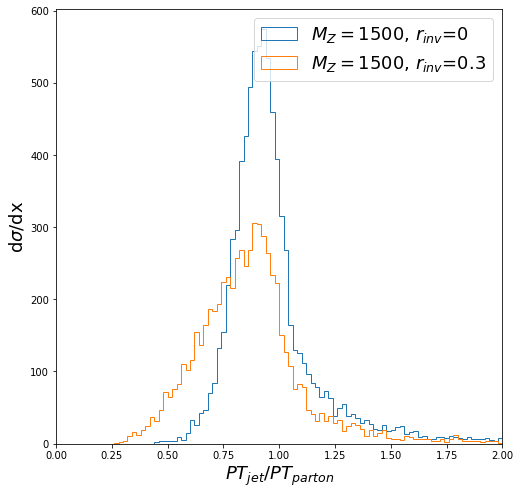

In [235]:
#Jet 
bins = 100
fs=18 # front size
tagsize = 18 # label tag size ((\blue block) W \n (\orange block) QCD )
plt.figure(figsize=(8,8)) # plotsize
x1, x2 = 0, 2


plt.hist(jet_reso  ,bins=bins, histtype='step',  range=[x1, x2], label='$M_{Z}=1500$, $r_{inv}$=0')
plt.hist(jet_reso2  ,bins=bins, histtype='step',  range=[x1, x2], label='$M_{Z}=1500$, $r_{inv}$=0.3')

plt.legend(prop={'size': tagsize}) # plot label tag
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('${PT_{jet}/PT_{parton}}$' , fontsize=fs)  # plot x-axis label
plt.ylabel("d${\sigma}$/dx", fontsize=fs)  # plot y-axis label $\u03C3^{-1}$
# plt.ylim((0,5000000))
plt.xlim((x1,x2))
plt.savefig("./leadinjet_resonace.png")  #save figure as png  
plt.show() 

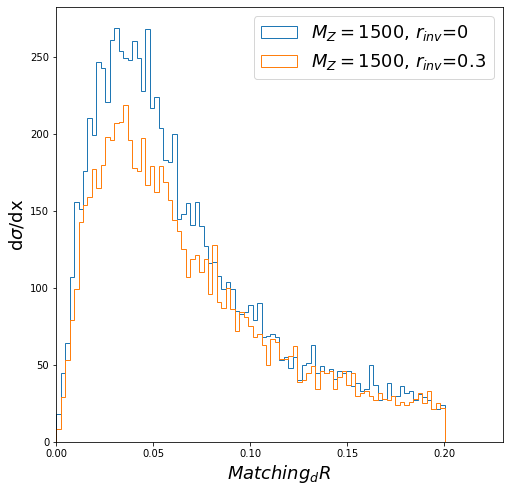

In [236]:
#Jet 
bins = 100
fs=18 # front size
tagsize = 18 # label tag size ((\blue block) W \n (\orange block) QCD )
plt.figure(figsize=(8,8)) # plotsize
x1, x2 = 0, 0.23

plt.hist(jet_dR  ,bins=bins, histtype='step',  range=[x1, x2], label='$M_{Z}=1500$, $r_{inv}$=0')
plt.hist(jet_dR2  ,bins=bins, histtype='step',  range=[x1, x2], label='$M_{Z}=1500$, $r_{inv}$=0.3')
# plt.hist(jet_dR  ,bins=bins, histtype='step',  range=[x1, x2], label='Matching Jet dR')
  
plt.legend(prop={'size': tagsize}) # plot label tag
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('${Matching_dR}$' , fontsize=fs)  # plot x-axis label
plt.ylabel("d${\sigma}$/dx", fontsize=fs)  # plot y-axis label $\u03C3^{-1}$
# plt.ylim((0,5000000))
plt.xlim((x1,x2))
plt.savefig("./leadinjet_dR.png")  #save figure as png  
plt.show() 

In [ ]:
plt.hist([jet_pT[i]/parton_pT[i] for i in range(len(jet_pT))] , bins=100)
plt.show()